# Airbnb Listings – Exploratory Data Analysis & Visualization with Pandas

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###  Data Cleaning & Preprocessing 

In [2]:
# Load the dataset and display the first 5 rows.

# Get current working directory
cwd = os.getcwd()

# Define the folder and filename
data_dir = os.path.join(cwd, 'Data')   # 'Data' is the subfolder
file_name = 'airbnb.csv'

# Create the full path
file_path = os.path.join(data_dir, file_name)


In [3]:

df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,id,name,rating,reviews,host_name,host_id,address,features,amenities,...,price,country,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout
0,0,49849504,Perla bungalov,4.71,64,Mehmetcan,357334205.0,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...",...,8078,Turkey,1,1,2,0,2,0,Flexible,12 00 pm
1,1,50891766,Authentic Beach Architect Sheltered Villa with...,New,0,Fatih,386223873.0,"Kaş, Antalya, Turkey","4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...",...,4665,Turkey,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am
2,2,50699164,cottages sataplia,4.85,68,Giorgi,409690853.0,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...",...,5991,Georgia,1,3,4,0,1,0,After 1 00 pm,12 00 pm
3,3,49871422,Sapanca Breathable Bungalow,5.0,13,Melih,401873242.0,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...",...,11339,Turkey,1,2,4,0,1,0,After 2 00 pm,12 00 pm
4,4,51245886,Bungalov Ev 2,New,0,Arp Sapanca,414884116.0,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...",...,6673,Turkey,1,1,2,0,1,0,After 2 00 pm,12 00 pm


In [4]:
df.columns

Index(['Unnamed: 0', 'id', 'name', 'rating', 'reviews', 'host_name', 'host_id',
       'address', 'features', 'amenities', 'safety_rules', 'hourse_rules',
       'img_links', 'price', 'country', 'bathrooms', 'beds', 'guests',
       'toiles', 'bedrooms', 'studios', 'checkin', 'checkout'],
      dtype='object')

In [5]:
# shape of data
df.shape

(12805, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12805 entries, 0 to 12804
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    12805 non-null  int64  
 1   id            12805 non-null  int64  
 2   name          12805 non-null  object 
 3   rating        12805 non-null  object 
 4   reviews       12805 non-null  object 
 5   host_name     12797 non-null  object 
 6   host_id       12805 non-null  float64
 7   address       12805 non-null  object 
 8   features      12805 non-null  object 
 9   amenities     12805 non-null  object 
 10  safety_rules  12805 non-null  object 
 11  hourse_rules  12805 non-null  object 
 12  img_links     12805 non-null  object 
 13  price         12805 non-null  int64  
 14  country       12805 non-null  object 
 15  bathrooms     12805 non-null  int64  
 16  beds          12805 non-null  int64  
 17  guests        12805 non-null  int64  
 18  toiles        12805 non-nu

In [7]:
# Check for missing values and handle them appropriately.

df.isnull().sum()

Unnamed: 0         0
id                 0
name               0
rating             0
reviews            0
host_name          8
host_id            0
address            0
features           0
amenities          0
safety_rules       0
hourse_rules       0
img_links          0
price              0
country            0
bathrooms          0
beds               0
guests             0
toiles             0
bedrooms           0
studios            0
checkin          800
checkout        2450
dtype: int64

two columns with notable missing data:

checkin: 800 missing

checkout: 2450 missing

host_name: Only 8 missing → very minor

In [8]:
df['checkin'].fillna('Not Provided',inplace=True)
df['checkout'].fillna('Not Provided',inplace=True)
df['host_name'].fillna('Not Available',inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_16404\1356250439.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['checkin'].fillna('Not Provided',inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_16404\1356250439.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [9]:
df.isnull().sum()

Unnamed: 0      0
id              0
name            0
rating          0
reviews         0
host_name       0
host_id         0
address         0
features        0
amenities       0
safety_rules    0
hourse_rules    0
img_links       0
price           0
country         0
bathrooms       0
beds            0
guests          0
toiles          0
bedrooms        0
studios         0
checkin         0
checkout        0
dtype: int64

In [10]:
# Drop the column Unnamed: 0.

df.drop(columns=['Unnamed: 0'],inplace=True)
df.sample()

,id,name,rating,reviews,host_name,host_id,address,features,amenities,safety_rules,...,price,country,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout
2783,6155961,Nature & horses 4 mountain lovers!,4.88,18,Ewa,8414981.0,"Janowice Wielkie, Lower Silesian Voivodeship, ...","16 guests,6 bedrooms,31 beds,3 shared bathrooms","Mountain view,Valley view,Ski-in/Ski-out,Kitch...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...",...,818,Poland,3,31,16,0,6,0,Not Provided,Not Provided


In [11]:
# Rename the columns hourse_rules to house_rules and toiles to toilets.

df.rename(columns={'hourse_rules':'house_rules','toiles':'toilets'},inplace=True)
df.columns

Index(['id', 'name', 'rating', 'reviews', 'host_name', 'host_id', 'address',
       'features', 'amenities', 'safety_rules', 'house_rules', 'img_links',
       'price', 'country', 'bathrooms', 'beds', 'guests', 'toilets',
       'bedrooms', 'studios', 'checkin', 'checkout'],
      dtype='object')

In [12]:
# Convert the 'price' column from string to float (remove $, commas)
df['price'] = df['price'].replace({r'\$': '', ',': ''}, regex=True).astype(float)
df['price'].dtype

dtype('float64')

In [13]:
# Convert rating to float and check for invalid (non-numeric) values.
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')


In [14]:
# Fill missing reviews with 0 and convert it to integer.
df['rating']=df['rating'].fillna(0).astype(int)

In [15]:
# Extract country names and count the number of unique countries.
df['country_clean']=df['country'].str.strip()
df['country_clean'].unique()


array(['Turkey', 'Georgia', 'Vietnam', 'Thailand', 'South Korea', 'India',
       'Philippines', 'Japan', 'Lebanon', 'Taiwan', 'Israel', 'Armenia',
       'Cyprus', 'Lithuania', 'Slovakia', 'Denmark', 'Germany',
       'Indonesia', 'Poland', 'Romania', 'Greece', 'Ukraine', 'Hungary',
       'Albania', 'Bulgaria', 'Malaysia', 'Montenegro', 'Slovenia',
       'Czechia', 'Sweden', 'Austria', 'Croatia', 'Tanzania', 'Italy',
       'Sri Lanka', 'Bosnia & Herzegovina', 'Kenya', 'Serbia',
       'Seychelles', 'Finland', 'Norway', 'Iceland', 'Greenland',
       'United States', 'Canada', 'Svalbard & Jan Mayen', 'France',
       'Australia', 'Morocco', 'Egypt', 'South Africa', 'Spain',
       'United Arab Emirates', 'United Kingdom', 'Pakistan', 'Nepal',
       'Singapore', 'Cambodia', 'Azerbaijan', 'Estonia', 'Latvia',
       'Costa Rica', 'Netherlands', 'Portugal', 'New Zealand', 'Panama',
       'Mexico', 'Peru', 'Chile', 'Belize', 'Colombia', 'Switzerland',
       'Ireland', 'Bolivia', 'Bel

In [16]:
unique_Country=df['country_clean'].nunique()
unique_Country

119

In [17]:
# Check for duplicate listings based on id and host_id.
duplicates = df[df.duplicated(subset=['id', 'host_id'])]
duplicates


,id,name,rating,reviews,host_name,host_id,address,features,amenities,safety_rules,...,country,bathrooms,beds,guests,toilets,bedrooms,studios,checkin,checkout,country_clean


In [18]:
# Drop all rows where the address, price, or host_name is missing.
df.dropna(subset=['address', 'price', 'host_name'], inplace=True)
df.shape

(12805, 23)

### Descriptive Stats & Exploration

In [19]:
# What is the average price of all listings?

avg_price= df['price'].mean()
avg_price

17697.800312377978

In [20]:
# What is the average rating across all listings?

average_rating = df['rating'].mean()
average_rating

2.8318625536899646

In [21]:
# Count the number of listings with a rating above 4.8.
high_rated_listings=df[df['rating']>4.8].shape[0]
high_rated_listings


2001

In [22]:
# List the top 10 most expensive listings.
top_10_expensive = df.nlargest(10, 'price')
top_10_expensive


,id,name,rating,reviews,host_name,host_id,address,features,amenities,safety_rules,...,country,bathrooms,beds,guests,toilets,bedrooms,studios,checkin,checkout,country_clean
4488,547559802034179497,38 MT 5 CABINS DELUXE MOTOR YACHT,0,0,Important Yachting,374411260.0,"Bodrum, Muğla, Turkey","10 guests,5 bedrooms,7 beds,5 bathrooms","Beach access,Kitchen,Wifi,Dedicated workspace,...","󹀁,Airbnb's COVID-19 safety practices apply,Car...",...,Turkey,5,7,10,0,5,0,After 3 00 pm,10 00 am,Turkey
4844,44180697,Romantic hideaway in the middle of the Mols Mo...,4,45,Bjørn,15528264.0,"Knebel, Denmark","2 guests,1 bedroom,2 beds,Toilet with sink","Kitchen,Free parking on premises,Refrigerator,...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...",...,Denmark,0,2,2,1,1,0,After 1 00 pm,11 00 am,Denmark
11076,594172414809502943,Dimora Torricella,0,0,Olivers,445147605.0,"Bottai, Toscana, Italy","16 guests,19 bedrooms,18.5 bathrooms","Kitchen,Wifi,Private indoor pool,TV,Washing ma...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...",...,Italy,18,0,16,0,19,0,3 00 pm - 8 00 pm,11 00 am,Italy
10827,597123075031935466,Premier Wedding & Event Space,0,0,Tommy,64234578.0,"Bermuda Dunes, California, United States","16 guests,1 bedroom,1 bed,2 bathrooms","Kitchen,Wifi,Free parking on premises,Private ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...",...,United States,2,1,16,0,1,0,After 3 00 pm,Not Provided,United States
4529,596652722564147148,LUXURY SUPERYACHT 85FT,0,0,Alyzeea,299460936.0,"Eden Island, Seychelles, Seychelles","8 guests,4 bedrooms,6 beds,4 bathrooms","Kitchen,Wifi,Dedicated workspace,Hot tub,TV,Ai...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...",...,Seychelles,4,6,8,0,4,0,After 12 00 pm,10 00 am,Seychelles
10928,30951471,Casa Serena - Home of Terry Gou - Entire Chateau,0,0,Chateau,231279133.0,"Vidice, Středočeský kraj, Czechia","16 guests,12 bedrooms,12 beds,12 bathrooms","Kitchen,Wifi,Free parking on premises,Pool,Hot...","󹀁,Airbnb's COVID-19 safety practices apply,Car...",...,Czechia,12,12,16,0,12,0,12 00 pm - 12 00 am,Not Provided,Czechia
11122,3429837,Villa Machiavelli,0,0,Villa Mangiacane,17286321.0,"San Casciano in Val di pesa, Toscana, Italy","16 guests,10 bedrooms,16 beds,8 bathrooms","Kitchen,Wifi,Free parking on premises,Pool,TV,...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...",...,Italy,8,16,16,0,10,0,3 00 pm - 11 00 pm,Not Provided,Italy
4585,53710161,Botanica Villa by Luxury Explorers Collection,0,0,Luxury Explorers Collection,189959685.0,"Dubai, United Arab Emirates","13 guests,8 bedrooms,1 bed,9 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...",...,United Arab Emirates,9,1,13,0,8,0,After 3 00 pm,Not Provided,United Arab Emirates
7078,43512940,Nafsika Estate,0,0,Reservations,47748353.0,"Megalochori, Greece","10 guests,5 bedrooms,6 beds,5 bathrooms","Wifi,Private pool,TV,Air conditioning,Hair dry...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...",...,Greece,5,6,10,0,5,0,Not Provided,11 00 am,Greece
5907,38200470,Eden Villa with adjoining bedrooms & private p...,0,0,Eden Villas,188288153.0,"Imerovigli, Greece","16 guests,7 bedrooms,7 beds,7 bathrooms","Kitchen,Wifi,Pool,TV,Air conditioning,Hair dry...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...",...,Greece,7,7,16,0,7,0,After 3 00 pm,Not Provided,Greece


In [23]:
# another method
df.sort_values(by='price', ascending=False).head(10)

,id,name,rating,reviews,host_name,host_id,address,features,amenities,safety_rules,...,country,bathrooms,beds,guests,toilets,bedrooms,studios,checkin,checkout,country_clean
4488,547559802034179497,38 MT 5 CABINS DELUXE MOTOR YACHT,0,0,Important Yachting,374411260.0,"Bodrum, Muğla, Turkey","10 guests,5 bedrooms,7 beds,5 bathrooms","Beach access,Kitchen,Wifi,Dedicated workspace,...","󹀁,Airbnb's COVID-19 safety practices apply,Car...",...,Turkey,5,7,10,0,5,0,After 3 00 pm,10 00 am,Turkey
4844,44180697,Romantic hideaway in the middle of the Mols Mo...,4,45,Bjørn,15528264.0,"Knebel, Denmark","2 guests,1 bedroom,2 beds,Toilet with sink","Kitchen,Free parking on premises,Refrigerator,...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...",...,Denmark,0,2,2,1,1,0,After 1 00 pm,11 00 am,Denmark
11076,594172414809502943,Dimora Torricella,0,0,Olivers,445147605.0,"Bottai, Toscana, Italy","16 guests,19 bedrooms,18.5 bathrooms","Kitchen,Wifi,Private indoor pool,TV,Washing ma...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...",...,Italy,18,0,16,0,19,0,3 00 pm - 8 00 pm,11 00 am,Italy
10827,597123075031935466,Premier Wedding & Event Space,0,0,Tommy,64234578.0,"Bermuda Dunes, California, United States","16 guests,1 bedroom,1 bed,2 bathrooms","Kitchen,Wifi,Free parking on premises,Private ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...",...,United States,2,1,16,0,1,0,After 3 00 pm,Not Provided,United States
4529,596652722564147148,LUXURY SUPERYACHT 85FT,0,0,Alyzeea,299460936.0,"Eden Island, Seychelles, Seychelles","8 guests,4 bedrooms,6 beds,4 bathrooms","Kitchen,Wifi,Dedicated workspace,Hot tub,TV,Ai...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...",...,Seychelles,4,6,8,0,4,0,After 12 00 pm,10 00 am,Seychelles
10928,30951471,Casa Serena - Home of Terry Gou - Entire Chateau,0,0,Chateau,231279133.0,"Vidice, Středočeský kraj, Czechia","16 guests,12 bedrooms,12 beds,12 bathrooms","Kitchen,Wifi,Free parking on premises,Pool,Hot...","󹀁,Airbnb's COVID-19 safety practices apply,Car...",...,Czechia,12,12,16,0,12,0,12 00 pm - 12 00 am,Not Provided,Czechia
11122,3429837,Villa Machiavelli,0,0,Villa Mangiacane,17286321.0,"San Casciano in Val di pesa, Toscana, Italy","16 guests,10 bedrooms,16 beds,8 bathrooms","Kitchen,Wifi,Free parking on premises,Pool,TV,...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...",...,Italy,8,16,16,0,10,0,3 00 pm - 11 00 pm,Not Provided,Italy
4585,53710161,Botanica Villa by Luxury Explorers Collection,0,0,Luxury Explorers Collection,189959685.0,"Dubai, United Arab Emirates","13 guests,8 bedrooms,1 bed,9 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...",...,United Arab Emirates,9,1,13,0,8,0,After 3 00 pm,Not Provided,United Arab Emirates
7078,43512940,Nafsika Estate,0,0,Reservations,47748353.0,"Megalochori, Greece","10 guests,5 bedrooms,6 beds,5 bathrooms","Wifi,Private pool,TV,Air conditioning,Hair dry...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...",...,Greece,5,6,10,0,5,0,Not Provided,11 00 am,Greece
5907,38200470,Eden Villa with adjoining bedrooms & private p...,0,0,Eden Villas,188288153.0,"Imerovigli, Greece","16 guests,7 bedrooms,7 beds,7 bathrooms","Kitchen,Wifi,Pool,TV,Air conditioning,Hair dry...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...",...,Greece,7,7,16,0,7,0,After 3 00 pm,Not Provided,Greece


In [24]:
# Find the total number of guests that can be accommodated globally.

total_guests=df['guests'].sum()
total_guests

66762

In [25]:
# What is the average number of beds and bathrooms per listing?

avg_beds = df['beds'].mean()
avg_bathrooms = df['bathrooms'].mean()
print(f"Average number of beds: {avg_beds}, Average number of bathrooms: {avg_bathrooms}")

Average number of beds: 3.316751269035533, Average number of bathrooms: 1.8744240531042562


In [26]:
# Find how many listings are studio apartments (studios > 0).

df[df['studios']>0].shape[0]

302

In [27]:
# Count how many listings have more than 3 bedrooms and at least 2 bathrooms.

listings_3_bedrooms_2_bathrooms = df[(df['bedrooms'] > 3) & (df['bathrooms'] >= 2)].shape[0]
listings_3_bedrooms_2_bathrooms

1799

In [28]:
# Find the host with the most number of listings.

df['host_name'].value_counts().idxmax()

'Onda'

In [32]:
# List top 5 host names by total number of reviews received.


# Convert 'reviews' to numeric (it's stored as strings)

df['reviews']= pd.to_numeric(df['reviews'], errors='coerce')


top_5_hosts_by_reviews = df.groupby('host_name')['reviews'].sum().nlargest(5).astype(int)

print(top_5_hosts_by_reviews)


host_name
Maria     1935
Anna      1861
Laura     1675
George    1609
John      1551
Name: reviews, dtype: int32


### Grouping & Aggregation 

In [35]:
# Group by country and calculate the average price.
df.groupby('country_clean')['price'].mean()



country_clean
Albania           4749.750000
Argentina        10647.000000
Armenia           6591.166667
Australia        26735.000000
Austria          20849.555556
                     ...     
Uruguay           9828.500000
Uzbekistan        3502.000000
Vanuatu          15718.000000
Vietnam          11310.233010
Åland Islands     5301.000000
Name: price, Length: 119, dtype: float64

In [37]:
#Group by country and find total number of listings.
df.groupby('country_clean')['id'].size()


country_clean
Albania            4
Argentina          3
Armenia            6
Australia         25
Austria           63
                ... 
Uruguay            2
Uzbekistan         2
Vanuatu            1
Vietnam          103
Åland Islands      1
Name: id, Length: 119, dtype: int64

In [38]:
df.groupby('country_clean')['id'].count()

country_clean
Albania            4
Argentina          3
Armenia            6
Australia         25
Austria           63
                ... 
Uruguay            2
Uzbekistan         2
Vanuatu            1
Vietnam          103
Åland Islands      1
Name: id, Length: 119, dtype: int64

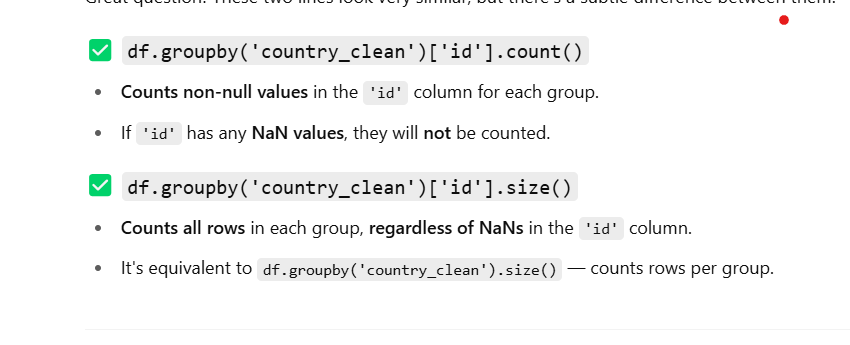

In [39]:
# Group by country and get the average rating per country.

df.groupby('country_clean')['rating'].mean()

country_clean
Albania          4.000000
Argentina        1.333333
Armenia          2.500000
Australia        4.240000
Austria          2.936508
                   ...   
Uruguay          2.000000
Uzbekistan       2.000000
Vanuatu          4.000000
Vietnam          2.155340
Åland Islands    4.000000
Name: rating, Length: 119, dtype: float64

In [40]:
# Find the top 5 countries with highest average price.

df.groupby('country_clean')['rating'].mean().nlargest(5)

country_clean
Chile          4.625000
Malta          4.333333
Peru           4.250000
Puerto Rico    4.250000
Australia      4.240000
Name: rating, dtype: float64

In [44]:
# Group listings by host_id and compute total reviews per host.

df.groupby('host_id')['reviews'].sum()

host_id
23039.0        117.0
44636.0         18.0
50838.0         36.0
52656.0         16.0
58959.0         94.0
               ...  
473394426.0      0.0
474292464.0      0.0
475434018.0      0.0
475582112.0      0.0
475897305.0      0.0
Name: reviews, Length: 10375, dtype: float64

In [49]:
# Which country has the highest average number of guests per listing?
avg_guests_by_country = df.groupby('country_clean')['guests'].mean()
highest_avg_guests_country = avg_guests_by_country.idxmax()
highest_avg_guests_country 

'Bangladesh'

In [51]:
# Which host has the highest average rating (minimum 3 listings)?

host_avg_rating = df.groupby('host_name')['rating'].mean()
host_avg_rating_3_listings = host_avg_rating[df.groupby('host_name').size() >= 3]
highest_avg_rating_host = host_avg_rating_3_listings.idxmax()
highest_avg_rating_host 

'Elizabeth'

In [52]:
# Group by host_name and compute average number of bedrooms.
df.groupby('host_name')['bedrooms'].mean()


host_name
&quot;Das Rittergut Bömitz&quot;    2.0
(Email Hidden By Airbnb)            2.0
)                                   3.0
- Wir Sind Dani & Arno              6.0
0mar                                7.0
                                   ... 
호종                                  1.0
희순                                  1.0
희원                                  1.0
희정                                  1.0
ﾍﾞｱｸﾙ                               1.0
Name: bedrooms, Length: 6838, dtype: float64

In [53]:
# Group by country and count how many listings have more than 3 beds.

df[df['beds'] > 3].groupby('country_clean')['id'].count()

country_clean
Albania           1
Argentina         1
Armenia           1
Australia         6
Austria          27
                 ..
United States    57
Uruguay           1
Uzbekistan        1
Vanuatu           1
Vietnam          23
Name: id, Length: 103, dtype: int64

In [56]:
# Calculate the total revenue per host (price × guests) and find the top 5.
df['revenue'] = df['price'] * df['guests']
df.groupby('host_name')['revenue'].sum().nlargest(5)

host_name
Itinere Villas                 39778795.0
Olivers                        28876336.0
Important Yachting             26093663.0
David                          25466718.0
Luxury Explorers Collection    24932180.0
Name: revenue, dtype: float64

In [ ]:

🧹 Section 4: String & List Column Parsing (Q31–40)
Parse the amenities column to count how many listings offer Wi-Fi.

Find the top 10 most common amenities across all listings.

How many listings mention “Pet friendly” in the features column?

Check how many listings have both “Kitchen” and “Washer” in amenities.

Count listings that include “No smoking” in safety_rules.

Create a new column: amenity_count = number of amenities per listing.

Count listings with amenity_count > 15.

Create a column luxury_flag if price > $500 and amenity_count > 10.

Extract city name (if possible) from address and count top 5 cities.

Find listings with check-in after 3 PM and check-out before 9 AM.

📈 Section 5: Visualization-Oriented Insights (Q41–45)
Plot histogram of prices (log scale).

Plot bar chart of average price by country.

Create boxplot of ratings grouped by country.

Plot scatterplot of price vs. number of reviews.

Generate a pie chart showing listing distribution by studio vs. non-studio.

📦 Section 6: Business-Oriented Scenarios (Q46–50)
Identify listings that are over-priced (price > mean + 2×std).

Create a flag column family_friendly if guests ≥ 4 and ≥ 2 beds.

Flag listings with missing safety rules as "needs review."

Which countries have the most luxury listings (price > $500)?

Export the cleaned dataset to a CSV file (airbnb_cleaned.csv).





SyntaxError: invalid character '🔄' (U+1F504) (1342420750.py, line 1)